<a href="https://colab.research.google.com/github/OrYSlliu/Labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [2]:
!pip install pandas
!pip install seaborn

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [21]:
df = pd.read_csv("/content/education_expenditure_supplementary_data.csv", index_col=None, header=0, engine='python')
Y = df['institute_type']
X = df['2000']

In [22]:
describe =  Y.describe()
describe

count                   333
unique                    3
top       All Institutions 
freq                    111
Name: institute_type, dtype: object

In [23]:
mean = X.mean()
mean

3.0626262626262624

In [24]:
median = X.median()  # (медиана) ваш код здесь
median

3.3

In [25]:
mode = X.mode()# (мода) ваш код здесь
mode

0    0.8
1    1.0
Name: 2000, dtype: float64

In [26]:
min = X.min() # (минимум) ваш код здесь
min

0.5

In [27]:
max = X.max()# (максимум) ваш код здесь
max

6.6

In [28]:
std = X.std()# (стандартное отклонение) Ваш код здесь
std

1.7254745492529187

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [29]:
q1 = X.quantile(0.25)# (25% квантиль) ваш код здесь
q1

1.2

In [30]:
q2 = X.quantile(0.5) # (50% квантиль) ваш код здесь
q2

3.3

In [31]:
q3 = X.quantile(0.75)# (75% квантиль) ваш код здесь
q3

4.35

In [32]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

3.1499999999999995

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```

```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

In [44]:
import plotly.express as plot

In [45]:
gr = plot.histogram(x = X, y = Y)
gr.show()

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [61]:
gr = plot.box(df, y = '2000')
gr

In [41]:
gr = plt.box(df, x = 'institute_type', y = '2000')
gr.show()

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

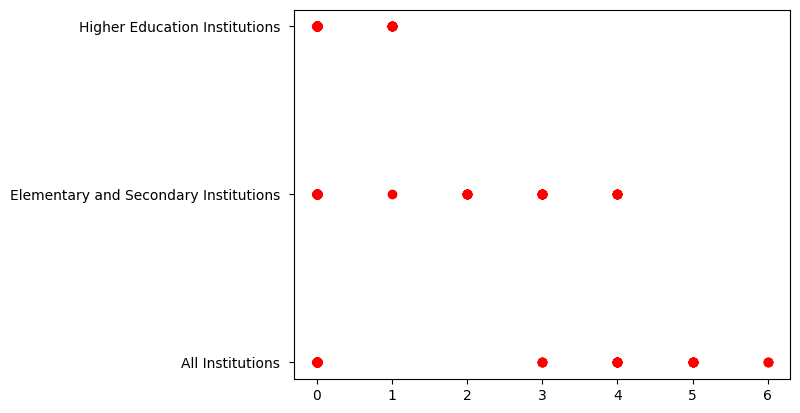

In [63]:
plt.scatter(X,Y,color='red')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

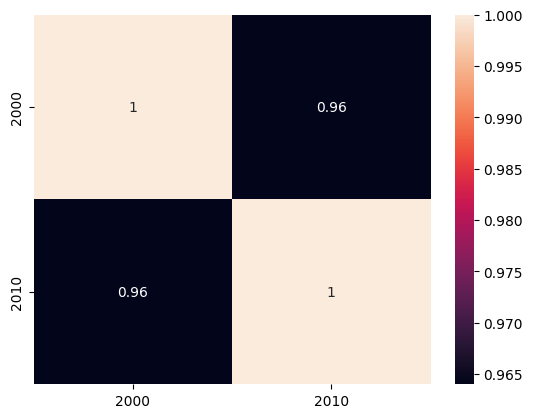

In [68]:
import seaborn as sns
corr_matrix = df[['2000','2010']].corr()
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**рейтинг 2000 года не зависит от 2010**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]